![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [ ]:
import numpy as np
data = np.load('/content/drive/My Drive/Sreevanth Assignments/Advanced Computer Vision/images.npy', allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)
- Hint: print data[10][1] 

In [ ]:
print(data[10][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


In [ ]:
print(data[5][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.486, 'y': 0.046}, {'x': 0.678, 'y': 0.272}], 'imageWidth': 500, 'imageHeight': 500}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.374, 'y': 0.524}, {'x': 0.542, 'y': 0.794}], 'imageWidth': 500, 'imageHeight': 500}]


In [ ]:
print(data[105][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.4217391304347826, 'y': 0.10038610038610038}, {'x': 0.6065217391304348, 'y': 0.5405405405405406}], 'imageWidth': 460, 'imageHeight': 259}]


In [ ]:
# It appears that there are images with more than one object also

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [ ]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [ ]:
X.shape

(409, 224, 224, 3)

In [ ]:
masks.shape

(409, 224, 224)

### Split the data into training and testing (2 marks)
- 400 images in training
- 9 images in testing data

Training data

In [ ]:
X_train = X[0:400]
y_train = masks[0:400]

In [ ]:
X_train.shape

(400, 224, 224, 3)

In [ ]:
y_train.shape

(400, 224, 224)

Testing data

In [ ]:
X_test = X[400:409]
y_test = masks[400:409]

In [ ]:
X_test.shape, y_test.shape

((9, 224, 224, 3), (9, 224, 224))

### Print a sample training image, image array and its mask (2 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


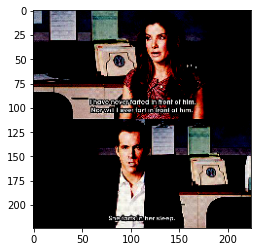

In [ ]:
# printing the image
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [ ]:
# Image array
X_train[5]

array([[[ 0.45882356,  0.47450984,  0.57647061],
        [ 0.45882356,  0.47450984,  0.57647061],
        [ 0.47450984,  0.49019611,  0.59215689],
        ...,
        [-0.72549021, -0.49803919, -0.16862744],
        [-0.75686276, -0.48235291, -0.30196077],
        [-0.74117649, -0.47450978, -0.27843136]],

       [[ 0.49803925,  0.52941179,  0.62352943],
        [ 0.49803925,  0.52941179,  0.62352943],
        [ 0.52941179,  0.56078434,  0.65490198],
        ...,
        [-0.74901962, -0.52156866, -0.21568626],
        [-0.65490198, -0.38823527, -0.17647058],
        [-0.67058825, -0.40392154, -0.18431371]],

       [[ 0.44313729,  0.47450984,  0.56862748],
        [ 0.36470592,  0.39607847,  0.49019611],
        [ 0.41960788,  0.45098042,  0.54509807],
        ...,
        [-0.65490198, -0.41960782, -0.13725489],
        [-0.84313726, -0.58431375, -0.32549018],
        [-0.85882354, -0.60000002, -0.34117645]],

       ...,

       [[-1.        , -1.        , -1.        ],
        [-1

Print the mask

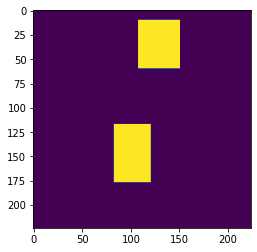

In [ ]:
# Printing the mask image
plt.imshow(y_train[5])

## Create the model (5 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

#def create_model(trainable=True):
model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    #for layer in model.layers:
        #layer.trainable = trainable
  
model.summary() 

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
# Defining the function to create model
def create_model(trainable=True):
  model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

  for layer in model.layers:
    layer.trainable = trainable

  block_1 = model.get_layer('conv_pw_1_relu').output
  block_2 = model.get_layer('conv_pw_3_relu').output
  block_3 = model.get_layer('conv_pw_5_relu').output
  block_4 = model.get_layer('conv_pw_11_relu').output
  block_5 = model.get_layer('conv_pw_13_relu').output

  x = Concatenate()([UpSampling2D()(block_5), block_4])
  x = Concatenate()([UpSampling2D()(x), block_3])
  x = Concatenate()([UpSampling2D()(x), block_2])
  x = Concatenate()([UpSampling2D()(x), block_1])
  x = UpSampling2D()(x)

  x = Conv2D(1, kernel_size=1, activation='sigmoid')(x)
  x = Reshape((224, 224))(x)

  return Model(inputs=model.input, outputs=x)

### Call the create_model function (1 mark)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [ ]:
model_1 = create_model()

### Print model summary (1 mark)

In [ ]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                             

### Define dice coefficient function (2 marks)
- Create a function to calculate dice coefficient


In [ ]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss function (2 marks)

In [ ]:
from tensorflow.keras.losses import binary_crossentropy
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.keras.backend.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [ ]:
model_1.compile(loss=loss, optimizer='Adam', metrics=[dice_coefficient])

### Define callbacks (2 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="auto", period=1)
stop = EarlyStopping(monitor="val_loss", patience=5, mode="auto")
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="auto")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [ ]:
model_1.fit(X_train,y_train,validation_data = (X_test, y_test),epochs = 10,verbose=1,batch_size=1,callbacks=[checkpoint,reduce_lr,stop])

Epoch 1/10
399/400 [============================>.] - ETA: 0s - loss: 1.2933 - dice_coefficient: 0.4984
Epoch 1: val_loss improved from inf to 1.17221, saving model to model-1.17.h5
400/400 [==============================] - 29s 40ms/step - loss: 1.2917 - dice_coefficient: 0.4986 - val_loss: 1.1722 - val_dice_coefficient: 0.4644 - lr: 0.0010
Epoch 2/10
399/400 [============================>.] - ETA: 0s - loss: 0.8404 - dice_coefficient: 0.6046
Epoch 2: val_loss improved from 1.17221 to 0.93804, saving model to model-0.94.h5
400/400 [==============================] - 16s 39ms/step - loss: 0.8397 - dice_coefficient: 0.6050 - val_loss: 0.9380 - val_dice_coefficient: 0.5059 - lr: 0.0010
Epoch 3/10
399/400 [============================>.] - ETA: 0s - loss: 0.7095 - dice_coefficient: 0.6503
Epoch 3: val_loss did not improve from 0.93804
400/400 [==============================] - 15s 39ms/step - loss: 0.7095 - dice_coefficient: 0.6500 - val_loss: 1.4260 - val_dice_coefficient: 0.4764 - lr: 0.

### Get the predicted mask for a test image   (2 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


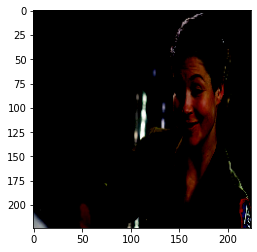

In [ ]:
plt.imshow(X_test[5])

Show original mask for test image

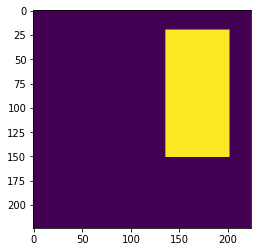

In [ ]:
plt.imshow(y_test[5])

Predict the mask on the test image

In [ ]:
predIdxs = model_1.predict(X_test)

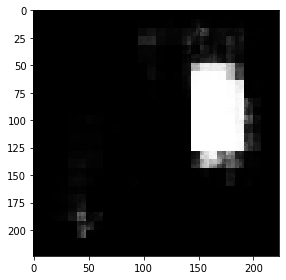

In [ ]:
from skimage import io
io.imshow(predIdxs[5])

### Impose the mask on the test image (2 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

In [ ]:
predIdxs[5].shape

(224, 224)

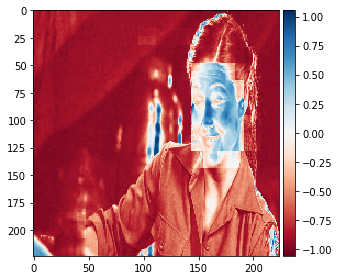

In [ ]:
from google.colab.patches import cv2_imshow
#img1= predIdxs[5].reshape(224, 224, 3)
#img1 = cv2.cvtColor(X_test[5], cv2.COLOR_BGR2GRAY)
#img1 = X_test[:,:,5]
img2 = predIdxs[5]
img1 = X_test[5] 
img1 = img1[:,:,2]

#img2 = np.expand_dims(predIdxs[5], axis=1)
#img2 = cv2.resize(img2, (224,224))
#sup_img = (img1 * 0.6) + (img2 * 0.1)
sup_img = img1 + (img2*0.6)
#superimposed_image = cv2.addWeighted(img1, 0.9, img2, 0.1, 0)
io.imshow(sup_img)